In [288]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics  #Import scikit-learn metrics module for accuracy calculation
from locale import atof

In [332]:
# reading dataset that is composed by 81 columns and 5356 rows
dataset = pd.read_csv(r"C:\Users\utente\Desktop\Project_Public_Health\dataset1.csv",sep=';')
df = pd.DataFrame(data=dataset)
df.shape

(5356, 81)

In [333]:
df.describe()

,ID,GENDER,AGE,DR1TKCAL,DR1TCHOL,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,...,DR1TFA,DR1TFF,DR1TFDFE,DR1TCALC,DR1TPHOS,DR1TMAGN,DR1TSODI,DR1TPOTA,DR1TCAFF,DR1TTHEO
count,5356.000000,5356.000000,5356.000000,5356.000000,5356.000000,5356.000000,5356.000000,5356.000000,5356.000000,5356.000000,...,5356.000000,5356.000000,5356.000000,5356.000000,5356.000000,5356.000000,5356.000000,5356.000000,5356.000000,5356.000000
mean,78661.754108,1.522405,46.988051,2123.211912,299.965086,403.749440,607.259709,385.952203,2212.247013,91.240105,...,175.986370,220.411314,519.551158,930.274832,1365.980769,297.357916,3506.697722,2586.188013,139.277819,36.828977
std,2916.964526,0.499544,18.317376,1034.482462,250.368519,404.639129,594.293506,1177.471214,4582.306717,414.433638,...,185.904021,152.582662,372.637382,598.921691,723.996291,160.015907,1862.818397,1283.361158,180.695032,86.906702
min,73557.000000,1.000000,18.000000,117.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,29.000000,68.000000,0.000000,0.000000
25%,76159.750000,1.000000,31.000000,1437.000000,129.750000,149.000000,253.000000,6.000000,271.000000,7.000000,...,62.000000,123.000000,287.000000,519.000000,892.750000,193.000000,2263.000000,1712.750000,9.000000,0.000000
50%,78705.500000,2.000000,46.000000,1941.500000,229.000000,302.000000,461.000000,42.000000,723.000000,27.000000,...,128.000000,186.000000,435.000000,808.000000,1240.000000,268.000000,3167.500000,2394.000000,89.500000,0.000000
75%,81144.750000,2.000000,62.000000,2594.000000,404.000000,540.000000,773.000000,215.000000,2253.250000,90.000000,...,224.000000,278.000000,644.000000,1188.000000,1685.500000,365.000000,4361.500000,3208.250000,197.000000,40.000000
max,83729.000000,2.000000,80.000000,12108.000000,2584.000000,7340.000000,8549.000000,35057.000000,78752.000000,24328.000000,...,2828.000000,2357.000000,5151.000000,7337.000000,11529.000000,2725.000000,21399.000000,15876.000000,2448.000000,2038.000000


In [334]:
#here we show that there are several missing values, in some cases like the pressure we considered the mean value within
#the 4 columns, if some case like BMI we considered the mean of the columns to replace
df.BPXSY4.head(8)

0       
1       
2       
3       
4       
5    128
6       
7       
Name: BPXSY4, dtype: object

In [335]:
#i just checked how many null values contains the feature BPXSY4, 4995 out 5356, so just 361 values not null 
c = (df["BPXSY1"].values == " ").sum() 
c


380

In [336]:
# delete the features meaningless or redundant
df =df.drop(['ID','DR1TATOA','DR1TB12A','DR1TFA','DR1TFDFE','DR1TFOLA','DR1TKCAL','DR1TMFAT','DR1TPFAT','DR1TSFAT','DR1TVARA'],axis=1)


In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5356 entries, 0 to 5355
Data columns (total 70 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   GENDER    5356 non-null   int64 
 1   AGE       5356 non-null   int64 
 2   DR1TPROT  5356 non-null   object
 3   DR1TCARB  5356 non-null   object
 4   DR1TSUGR  5356 non-null   object
 5   DR1TFIBE  5356 non-null   object
 6   DR1TTFAT  5356 non-null   object
 7   DR1TCHOL  5356 non-null   int64 
 8   DR1TATOC  5356 non-null   object
 9   DR1TRET   5356 non-null   int64 
 10  DR1TACAR  5356 non-null   int64 
 11  DR1TBCAR  5356 non-null   int64 
 12  DR1TCRYP  5356 non-null   int64 
 13  DR1TLYCO  5356 non-null   int64 
 14  DR1TLZ    5356 non-null   int64 
 15  DR1TVB1   5356 non-null   object
 16  DR1TVB2   5356 non-null   object
 17  DR1TNIAC  5356 non-null   object
 18  DR1TVB6   5356 non-null   object
 19  DR1TFF    5356 non-null   int64 
 20  DR1TCHL   5356 non-null   object
 21  DR1TVB12  5356

In [338]:
# we converted all string values into float considering errors as "coerce" in order that it was possible to 
#calculate the mean between 4 columns (if value is null it doesn't consider the cell)


df['BPXSY1'] = pd.to_numeric(df['BPXSY1'],errors='coerce').astype(float)
df['BPXDI1'] = pd.to_numeric(df['BPXDI1'],errors='coerce').astype(float)
df['BPXSY2'] = pd.to_numeric(df['BPXSY2'],errors='coerce').astype(float)
df['BPXDI2'] = pd.to_numeric(df['BPXDI2'],errors='coerce').astype(float)
df['BPXSY3'] = pd.to_numeric(df['BPXSY3'],errors='coerce').astype(float)
df['BPXDI3'] = pd.to_numeric(df['BPXDI3'],errors='coerce').astype(float)
df['BPXSY4'] = pd.to_numeric(df['BPXSY4'],errors='coerce').astype(float)



 

In [339]:
#those features are that one connected to the body index in which we decided to consider just 
#the Body mass Index as reference point
df = df.drop(['BMXWAIST','BMXWT','BMXHT','BMXLEG','BMXARMC'],axis=1)



# We consider the values of "Systolic blood pressure 1/2/3/4 measurements" as a single value considering the mean


In [340]:
df['Systolic_average_1_4'] = df[['BPXSY1', 'BPXSY2','BPXSY3','BPXSY4']].mean(axis=1)
df['Diastolic_average_1_4'] = df[['BPXDI1', 'BPXDI2','BPXDI3','BPXDI4']].mean(axis=1)
                
df =df.drop(['BPXSY1','BPXSY2','BPXSY3','BPXSY4','BPXDI1','BPXDI2','BPXDI3','BPXDI4'],axis=1)


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5356 entries, 0 to 5355
Data columns (total 59 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GENDER                 5356 non-null   int64  
 1   AGE                    5356 non-null   int64  
 2   DR1TPROT               5356 non-null   object 
 3   DR1TCARB               5356 non-null   object 
 4   DR1TSUGR               5356 non-null   object 
 5   DR1TFIBE               5356 non-null   object 
 6   DR1TTFAT               5356 non-null   object 
 7   DR1TCHOL               5356 non-null   int64  
 8   DR1TATOC               5356 non-null   object 
 9   DR1TRET                5356 non-null   int64  
 10  DR1TACAR               5356 non-null   int64  
 11  DR1TBCAR               5356 non-null   int64  
 12  DR1TCRYP               5356 non-null   int64  
 13  DR1TLYCO               5356 non-null   int64  
 14  DR1TLZ                 5356 non-null   int64  
 15  DR1T

In [341]:
#replacing the " " to 0
df.BMXBMI = df.BMXBMI.replace(" ", "0.0")


In [342]:
# before to convert strings into float we replaced the comma with the dot
df_new = df.iloc[:, [2,3,4,5,6,8,15,16,17,18,20,21,22,23,24,28,29,30,33,36,37,38,39,40,41,42,43,44,46,47,48,49,50,51,52,53,54,55,56]]
df2 = df_new.stack().str.replace(',','.').unstack()
df4 = df2.astype(float)

df4.insert(0, "GENDER",df. iloc[:, [0]], True)
df4.insert(1, "AGE",df. iloc[:, [1]], True)
df4.insert(7, "DR1TCHOL",df. iloc[:, [7]], True)
df4.insert(9, "DR1TRET",df. iloc[:, [9]], True)
df4.insert(10, "DR1TACAR",df. iloc[:, [10]], True)
df4.insert(11, "DR1TBCAR",df. iloc[:, [11]], True)
df4.insert(12, "DR1TCRYP",df. iloc[:, [12]], True)
df4.insert(13, "DR1TLYCO",df. iloc[:, [13]], True)
df4.insert(14, "DR1TLZ",df. iloc[:, [14]], True)
df4.insert(19, "DR1TFF",df. iloc[:, [19]], True)
df4.insert(25, "DR1TCALC",df. iloc[:, [25]], True)
df4.insert(26, "DR1TPHOS",df. iloc[:, [26]], True)
df4.insert(27, "DR1TMAGN",df. iloc[:, [27]], True)
df4.insert(31, "DR1TSODI",df. iloc[:, [31]], True)
df4.insert(32, "DR1TPOTA",df. iloc[:, [32]], True)
df4.insert(34, "DR1TCAFF",df. iloc[:, [34]], True)
df4.insert(35, "DR1TTHEO",df. iloc[:, [35]], True)
df4.insert(56, "Systolic_average_1_4",df. iloc[:, [57]], True)
df4.insert(57, "Diastolic_average_1_4",df. iloc[:, [58]], True)


In [659]:
# 45 BMI were 0 and we considered to replace with the mean of the column
mean_bmi = df4['BMXBMI'].mean(skipna=True)
df4.loc[df.BMXBMI ==0.0, 'BMXBMI'] =mean_bmi



45

In [661]:
df5 = df4.fillna(df.mean())   # this function replace the null values of the entire Data frame with the mean of the column


df5['BMXBMI'] = df5['BMXBMI'].replace(0, df5['BMXBMI'].mean())
e = sum(df5.BMXBMI==0)
e

0

In [476]:
# we standardized the Data in order the make the PCA

from sklearn.preprocessing import StandardScaler

df4_ = df5.iloc[: ,0:54] 

df_tot= df5.iloc[: ,0:58]
#Standardization
scaler = StandardScaler()

scaled_df=df4_.copy()

scaled_df2=df_tot.copy()

scaled1=pd.DataFrame(scaler.fit_transform(scaled_df), columns=scaled_df.columns)
scaled2=pd.DataFrame(scaler.fit_transform(scaled_df2), columns=scaled_df2.columns)


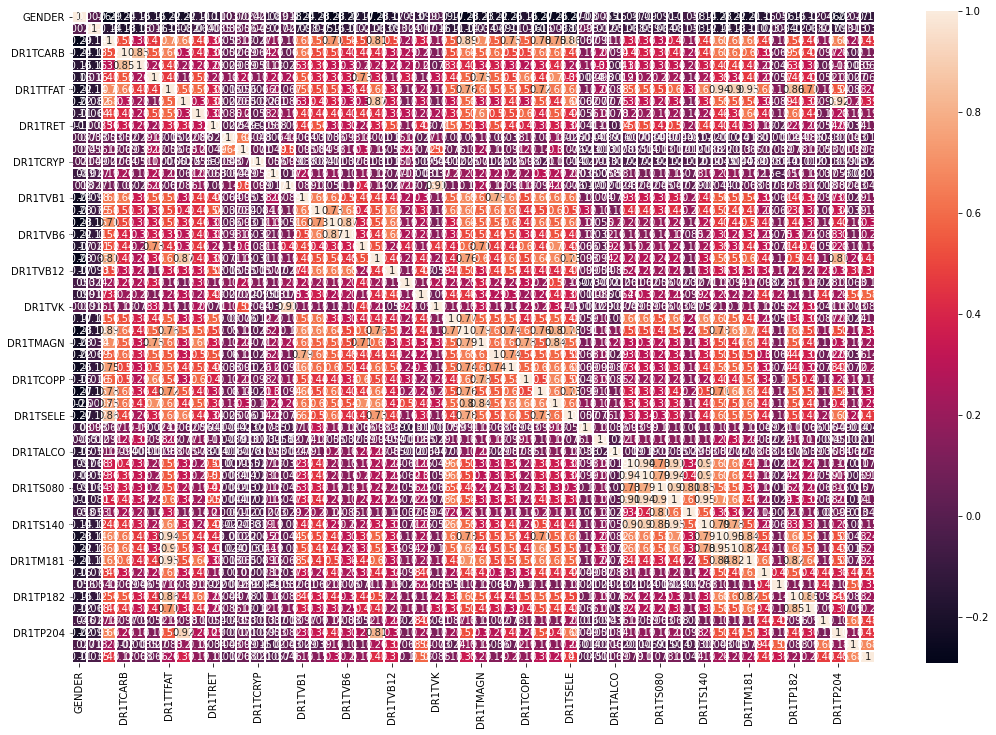

In [386]:
# correlation matrix
corr_matrix = scaled_df.corr()
sn.heatmap(corr_matrix, annot=True, linewidths=1)
plt.gcf().set_size_inches(18, 12)

# Principal Component Analysis

In [539]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
Principal_components=pca.fit_transform(scaled1)
pca_df = pd.DataFrame(data = Principal_components, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6','PC7','PC8'])
print(pca_df)

           PC 1      PC 2      PC 3      PC 4      PC 5      PC 6       PC7  \
0     -3.074498  0.080273 -0.729004 -0.255934  0.271390  0.525155  0.089616   
1     16.917010  2.402491  7.490692 -0.019565  3.356531 -8.088938 -4.358425   
2     -1.568191 -1.185796 -0.540192  0.031491  0.836942  0.540538 -0.186507   
3     -0.626940  1.315434 -0.508578 -0.301451 -1.106822 -0.701596 -0.452481   
4     -3.215667  0.259409  0.085302 -1.380280 -1.648250  0.678586  0.378942   
...         ...       ...       ...       ...       ...       ...       ...   
5351  -2.296912 -0.023797  0.454097 -0.692996  1.284568  0.087077  0.847372   
5352  -5.785797  0.009626  0.115953  0.157546  1.317802 -0.216075  0.394242   
5353  -2.973364 -1.531700  1.290102 -0.476071 -0.120433 -0.205031  0.726981   
5354  -6.790994  0.455024 -0.030571  0.244833  0.084441 -0.192576 -0.396352   
5355   2.581027  1.277841  0.728733  2.584059 -0.995207  1.460214 -0.114901   

           PC8  
0    -0.098020  
1    -0.294055  


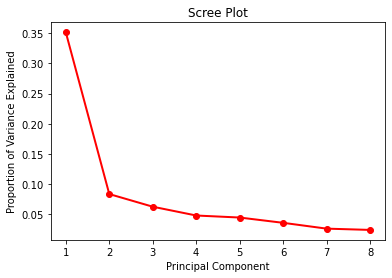

In [393]:
# Scree plot

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

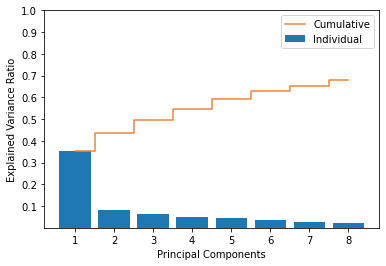

In [394]:
pca.fit_transform(scaled1)
pca_evr = pca.explained_variance_ratio_
pca_evr_cum = np.cumsum( pca_evr )
x = np.arange( 1, len( pca_evr ) + 1 )
k = np.linspace( 0.1, 1, 10 )
plt.bar( x, pca_evr, alpha=1, align='center', label='Individual' )
plt.step( x, pca_evr_cum, where='mid', label='Cumulative', color=sn.colors.xkcd_rgb.get( 'dusty orange' ) )
plt.ylabel( 'Explained Variance Ratio' )
plt.xlabel( 'Principal Components' )
plt.legend()
plt.xticks( x )
plt.yticks( k )
plt.show()

In [349]:
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  
out_sum = np.cumsum(pca.explained_variance_ratio_)  
print ("Cumulative Prop. Variance Explained: ", out_sum)

Proportion of Variance Explained :  [0.36323652 0.08672101 0.06499879 0.04910876 0.04639372 0.03732055
 0.02737528 0.02467077]
Cumulative Prop. Variance Explained:  [0.36323652 0.44995753 0.51495632 0.56406508 0.6104588  0.64777935
 0.67515462 0.69982539]


In [395]:
print(pca.explained_variance_)  # kaiser's rule

[18.98940672  4.5176504   3.38666214  2.59907685  2.41790257  1.94497901
  1.42645287  1.31096574]


In [396]:
# loadings matrix 
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7','PC8'], index=scaled1.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
GENDER,-0.067206,-0.034704,-0.035332,0.125885,-0.051767,0.060275,0.030133,-0.242740
AGE,-0.029691,0.029402,-0.036175,0.102706,0.022861,-0.012789,-0.079396,-0.087999
DR1TPROT,0.196107,0.088498,0.084155,-0.080581,0.010003,-0.153863,-0.093042,0.009218
DR1TCARB,0.167790,-0.028450,-0.109928,-0.102540,-0.010939,0.232009,0.142129,0.002386
DR1TSUGR,0.117780,-0.071386,-0.074031,-0.067360,0.000549,0.238051,0.344120,-0.080604
DR1TFIBE,0.139394,0.123805,-0.252523,0.044370,-0.005978,0.143855,-0.245052,-0.022376
DR1TTFAT,0.201596,-0.071229,0.021178,-0.066619,-0.241460,0.067928,0.036250,-0.000699
DR1TCHOL,0.145423,0.025665,0.184162,-0.071323,-0.122167,-0.376656,0.049077,-0.153645
DR1TATOC,0.145484,0.118674,-0.092358,-0.013053,-0.065843,0.143550,-0.026507,-0.067950
DR1TRET,0.129341,-0.099524,-0.001689,0.051312,0.232785,-0.064144,0.050201,-0.320400


In [540]:
#we just sorted the loadings matrix to see the most important feature for each PCi, in this case PC1
loadings.sort_values('PC1', ascending=False )



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
DR1TPHOS,0.211726,0.022835,0.015191,-0.035009,0.044260,-0.033491,-0.120793,-0.020423
DR1TTFAT,0.201596,-0.071229,0.021178,-0.066619,-0.241460,0.067928,0.036250,-0.000699
DR1TPROT,0.196107,0.088498,0.084155,-0.080581,0.010003,-0.153863,-0.093042,0.009218
DR1TS160,0.194742,-0.149105,0.038708,-0.046507,-0.173086,-0.002977,0.030807,-0.004596
DR1TPOTA,0.190076,0.120079,-0.110252,0.045686,0.039570,0.019450,-0.073443,0.026677
DR1TM181,0.186995,-0.015290,0.015443,-0.091408,-0.255074,0.086801,0.027485,-0.026682
DR1TS180,0.185634,-0.167146,0.040143,-0.058070,-0.165045,0.010697,0.061596,-0.007333
DR1TSODI,0.184174,0.034759,0.033117,-0.084043,-0.066775,-0.047447,-0.042438,0.056061
DR1TMAGN,0.181047,0.132203,-0.140531,0.017208,0.040908,0.085498,-0.158464,0.073392
DR1TSELE,0.178585,0.078812,0.120384,-0.074500,-0.005380,-0.143221,-0.121124,-0.003208


In [398]:
# as suggested by the scree plot we chose the first 4 pc
pca1= PCA(n_components=4)

In [399]:
pca1.fit(scaled1)

PCA(n_components=4)

In [400]:
pca1.transform(scaled1)

array([[-3.07449838e+00,  7.96114972e-02, -7.27017052e-01,
        -2.62783598e-01],
       [ 1.69170115e+01,  2.40290307e+00,  7.48688495e+00,
        -7.27486993e-03],
       [-1.56819328e+00, -1.18596347e+00, -5.39280445e-01,
         3.13619504e-02],
       ...,
       [-2.97336267e+00, -1.53179410e+00,  1.29057328e+00,
        -4.78054050e-01],
       [-6.79099450e+00,  4.54769429e-01, -2.99756526e-02,
         2.43416565e-01],
       [ 2.58102392e+00,  1.27795985e+00,  7.28528044e-01,
         2.58656931e+00]])

In [401]:
scores_pca1= pca1.transform(scaled1) 

# K-means Clustering

In [402]:
from sklearn.cluster import KMeans
import numpy as np

wcss = []
for i in range (1,15):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    kmeans_pca.fit(scores_pca1)
    wcss.append(kmeans_pca.inertia_)

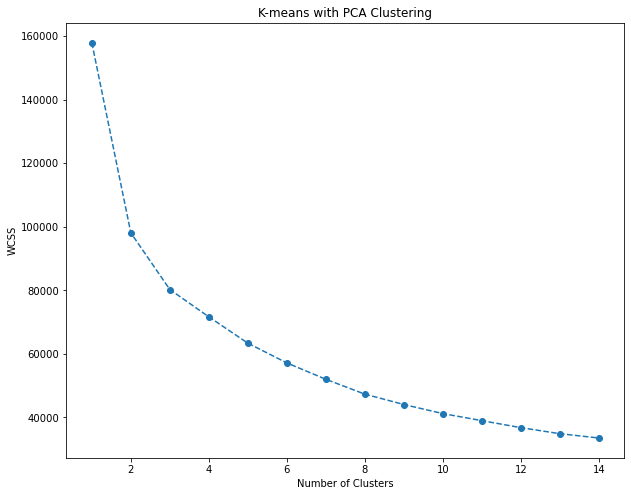

In [403]:
plt.figure(figsize = (10,8))
plt.plot(range(1,15), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [404]:
# apply kmeans with 4 clusters
kmeans_pca = KMeans(n_clusters= 4, init = 'k-means++',random_state= 42)

In [405]:
## we fit our data with k-means pca model
kmeans_pca.fit(scores_pca1)

KMeans(n_clusters=4, random_state=42)

In [541]:
#we create a new data frame with the original features and add the PCA socres and assigned clusters
df_segm_pca_kmeans = pd.concat([scaled1.reset_index(drop=True), pd.DataFrame(scores_pca1)], axis = 1)
df_segm_pca_kmeans.columns.values[-4:] = ['Component1','Component2','Component3','Component4']
#the last column we add contains the pca k-means clustering labels
df_segm_pca_kmeans['Segment k-means PCA'] = kmeans_pca.labels_

In [542]:
#we fit our data with k-means pca model
kmeans_pca.fit(scores_pca1)

KMeans(n_clusters=4, random_state=42)

In [544]:
# in each line we can see where each obs. has been clustered
df_segm_pca_kmeans.head()

,GENDER,AGE,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TCHOL,DR1TATOC,DR1TRET,...,DR1TP183,DR1TP184,DR1TP204,DR1TP205,DR1TP225,Component1,Component2,Component3,Component4,Segment k-means PCA
0,-1.04586,1.201810,-0.839562,-0.111715,0.806524,-0.563228,-0.592524,-0.363359,-0.637279,-0.824885,...,-0.724233,-0.287946,-0.479999,-0.293033,-0.631617,-3.074498,0.079611,-0.727017,-0.262784,3
1,-1.04586,0.382839,5.488472,1.300570,-0.825874,-0.018109,0.881098,9.123544,1.492978,2.652612,...,-0.014512,-0.098112,3.893807,8.673699,1.953818,16.917012,2.402903,7.486885,-0.007275,1
2,-1.04586,1.365604,-0.388757,-0.228262,-0.106889,-0.646381,-0.321219,-0.846691,-0.017727,0.524592,...,-0.496134,-0.287946,-0.838734,-0.293033,-0.482458,-1.568193,-1.185963,-0.539280,0.031362,0
3,-1.04586,0.492035,-0.592887,-0.495092,-0.369478,0.527009,0.254994,0.934849,0.411578,-0.325628,...,0.153562,-0.287946,0.678991,-0.257237,-0.308438,-0.626940,1.314992,-0.507138,-0.309459,0
4,-1.04586,0.983418,-0.958602,-0.288069,-0.167601,-0.914321,0.028838,-0.874653,-0.394465,-0.975650,...,0.499595,-0.287946,-0.569682,-0.301981,-0.606757,-3.215672,0.258994,0.085667,-1.380351,3


In [585]:
for i in range(4):
    print("cluster:",i)
    
    print(sum(df_segm_pca_kmeans['Segment k-means PCA']==i))
    

cluster: 0
2197
cluster: 1
138
cluster: 2
940
cluster: 3
2081


In [586]:
df_segm_pca_kmeans['Segment']= df_segm_pca_kmeans['Segment k-means PCA'].map({0: 'first',
                                                                              1: 'second',
                                                                              2: 'third',
                                                                              3: 'fourth'})

C:\Users\utente\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


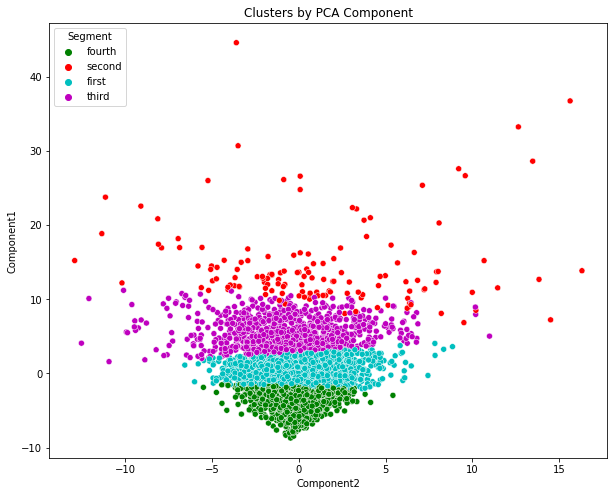

In [587]:
#plot data by PCA components, the y axis is the first component, X axis is the second


import seaborn as sns
x_axis= df_segm_pca_kmeans['Component2']
y_axis= df_segm_pca_kmeans['Component1']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis, hue= df_segm_pca_kmeans['Segment'], palette= ['g','r','c','m']) 
plt.title('Clusters by PCA Component')
plt.show()

In [588]:
# replacing null values with mean
mean_syst = df5['Systolic_average_1_4'].mean(skipna=True)

df5["Systolic_average_1_4"] = df5["Systolic_average_1_4"].fillna(mean_syst)

df5["Systolic_average_1_4"] 

0       112.666667
1       157.333333
2       142.000000
3       157.333333
4       141.333333
           ...    
5351    100.000000
5352    110.666667
5353    112.666667
5354    122.452235
5355    134.666667
Name: Systolic_average_1_4, Length: 5356, dtype: float64

In [589]:
#replacing with 0 or 1 according to a defined value of 120 and 130

cond15 = (df5['Systolic_average_1_4']<130) & (df5['Systolic_average_1_4']>120)

df5['Systolic_average_1_4'] = np.where(df5.Systolic_average_1_4 <= 120, 0, df5.Systolic_average_1_4) # systolic ok
df5['Systolic_average_1_4'] = np.where(cond15, 1, df5.Systolic_average_1_4) # systolic high
df5['Systolic_average_1_4'] = np.where(df5.Systolic_average_1_4 >= 130,2, df5.Systolic_average_1_4) # systolic too high


#replacing with 0 or 1 according to a defined value of 80 and 90

cond16 = (df5['Diastolic_average_1_4']<89) & (df5['Diastolic_average_1_4']>80)


df5['Diastolic_average_1_4'] = np.where(df5.Diastolic_average_1_4 <= 80, 0, df5.Diastolic_average_1_4)  #diastolic ok
df5['Diastolic_average_1_4'] = np.where(cond16, 1, df5.Diastolic_average_1_4) # diastolic high
df5['Diastolic_average_1_4'] = np.where(df5.Diastolic_average_1_4 >= 89,2, df5.Diastolic_average_1_4)   #diastolic too high



In [592]:
#convert float to int and counting people with normal Diastolic pressure
df5['Systolic_average_1_4'] = df5['Systolic_average_1_4'].astype(int)
df5['Diastolic_average_1_4'] = df5['Diastolic_average_1_4'].astype(int)

count = (df5['Diastolic_average_1_4'] == 0).sum() 
count  # the value of 4554 show that on average people have a mormal level of Diastolic pressure  
   # while 2780 for Systolic but still to do not represent a feature relevant in our clustering

4554

In [415]:
for_visual = pd.concat([pca_df, df5['Systolic_average_1_4'], df5['Diastolic_average_1_4']], axis = 1)
print(for_visual)

           PC 1      PC 2      PC 3      PC 4      PC 5      PC 6       PC7  \
0     -3.074498  0.078932 -0.728970 -0.264058  0.279611  0.522525  0.070263   
1     16.917012  2.399996  7.475243 -0.018581  3.371095 -8.209457 -4.309117   
2     -1.568193 -1.185123 -0.535370  0.035542  0.829221  0.595671 -0.178301   
3     -0.626940  1.313808 -0.510723 -0.312485 -1.096079 -0.720088 -0.488560   
4     -3.215672  0.259406  0.087605 -1.377890 -1.654187  0.737381  0.413253   
...         ...       ...       ...       ...       ...       ...       ...   
5351  -2.296913 -0.024927  0.451618 -0.695656  1.289081  0.086164  0.829115   
5352  -5.785798  0.009623  0.116935  0.156815  1.317219 -0.207762  0.363290   
5353  -2.973363 -1.532084  1.289460 -0.479495 -0.115599 -0.227113  0.675058   
5354  -6.790994  0.454582 -0.030238  0.245353  0.082835 -0.176153 -0.305920   
5355   2.581025  1.277654  0.728491  2.587653 -0.998854  1.496482 -0.103203   

           PC8  Systolic_average_1_4  Diastolic_ave

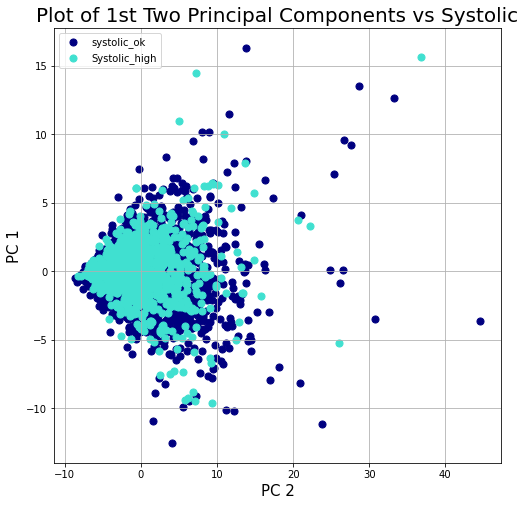

In [417]:
#plot in the first 2 PC vs Systolic

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_ylabel('PC 1', fontsize = 15)
ax.set_xlabel('PC 2', fontsize = 15)
ax.set_title('Plot of 1st Two Principal Components vs Systolic', fontsize = 20)
syst = ['systolic_ok','Systolic_high']
group = [0,1]
colors = ['navy', 'turquoise']
for group, color in zip(group,colors):
    indicesToKeep = for_visual['Systolic_average_1_4'] == group
    ax.scatter(for_visual.loc[indicesToKeep, 'PC 1']
               , for_visual.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)

ax.legend(syst)
ax.grid(group)

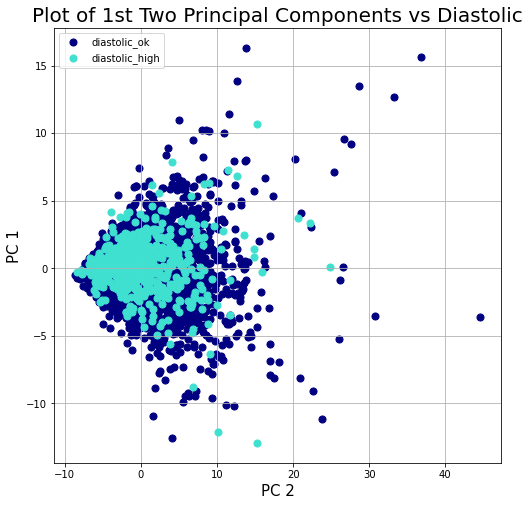

In [418]:
# plotting on PC1, PC2 differentiated by a cutoff of 80 in Diastolic 
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_ylabel('PC 1', fontsize = 15)
ax.set_xlabel('PC 2', fontsize = 15)
ax.set_title('Plot of 1st Two Principal Components vs Diastolic', fontsize = 20)
diast = ['diastolic_ok','diastolic_high']
group = [0,1]
colors = ['navy', 'turquoise']
for group, color in zip(group,colors):
    indicesToKeep = for_visual['Diastolic_average_1_4'] == group
    ax.scatter(for_visual.loc[indicesToKeep, 'PC 1']
               , for_visual.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)

ax.legend(diast)
ax.grid(group)

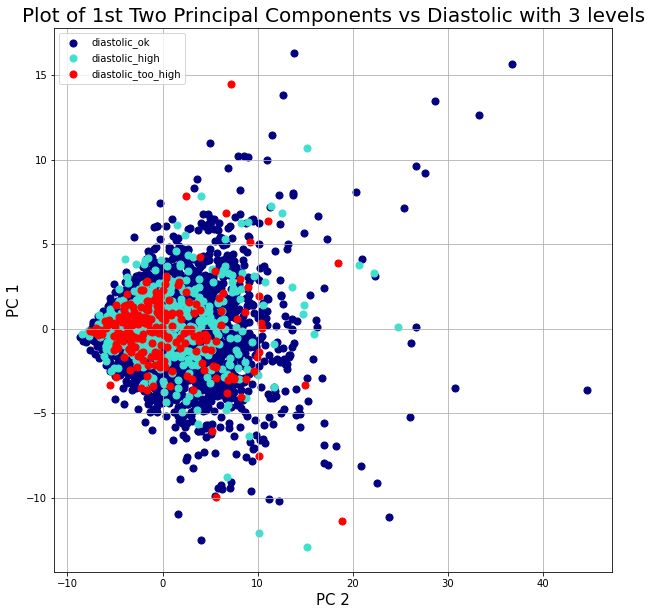

In [419]:
#plot in the first 2 PC vs Diastolic with 3 differentiated values  : ---> no insisghts

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_ylabel('PC 1', fontsize = 15)
ax.set_xlabel('PC 2', fontsize = 15)
ax.set_title('Plot of 1st Two Principal Components vs Diastolic with 3 levels', fontsize = 20)
diast = ['diastolic_ok','diastolic_high','diastolic_too_high']
group = [0,1,2]
colors = ['navy', 'turquoise','red']
for group, color in zip(group,colors):
    indicesToKeep = for_visual['Diastolic_average_1_4'] == group
    ax.scatter(for_visual.loc[indicesToKeep, 'PC 1']
               , for_visual.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)

ax.legend(diast)
ax.grid(group)

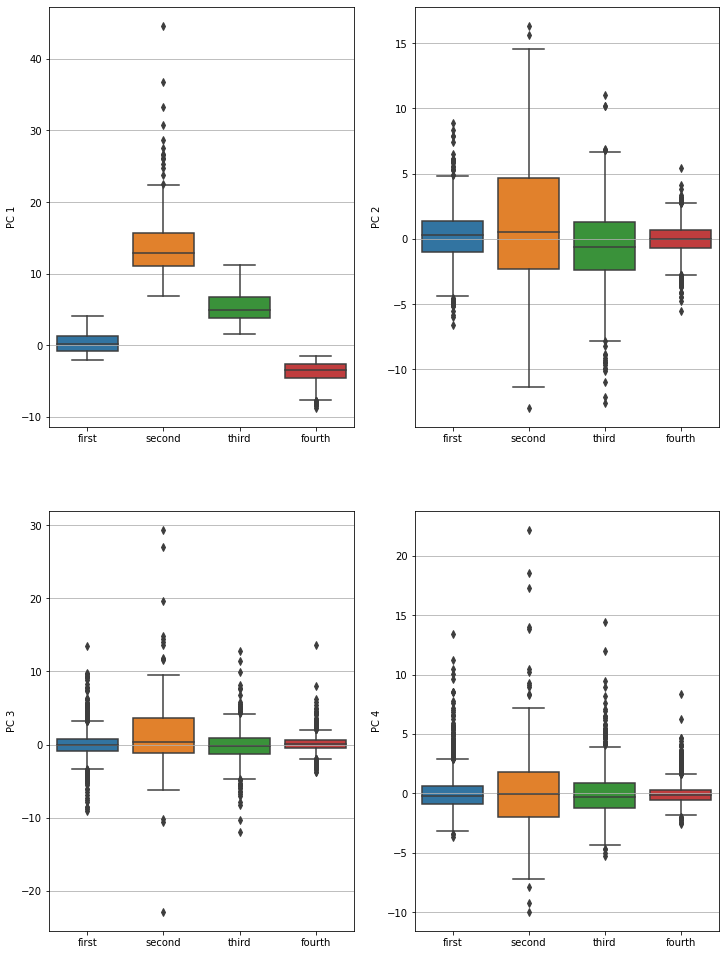

In [594]:
#this comparison is done with the first 4 PC, seems that the algorithm has built the clusters according to a defined criteria
# based on the average of the first PC, in fact for example cluster 2 has a mean much higher to respect to the other clusters and if 
# we look at the weights of the loading matrix we can see that it contains elements like:
# PC1 : fatty acids like Octadecanoic, polisatured acids like Exadecanoi, Phosporum an high level of this can represents a disease
# like cardiovascular, etc,..., Sodium, Magnesium, Selenium, Zincum where an high level of those items can be a risk

#PC2 : contains element "more healthy" like Omega3, Alpha and BetaCarotene, Antioxidants like yellow carotenoids, vitamine k

# it's like if the algorithm created the clusters from the "fats" (e.g. acids) to the "healthy"
# and this seems to be confirmed looking at the single plot below
plt.figure( figsize=( 12.0, 17.0 ) )
for i in range( 4):
    plt.subplot( 2,2, i + 1 )
    plt.grid( True )
    sn.boxplot( x=kmeans_pca.labels_, y=pca_df.columns[i], data=pca_df)
    plt.xticks( [ 0, 1,2,3], [ 'first', 'second','third','fourth'], rotation=0 )
# plt.tight_layout( True )
plt.show()

<ipython-input-500-7c1c24164c3c>:7: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout( True )


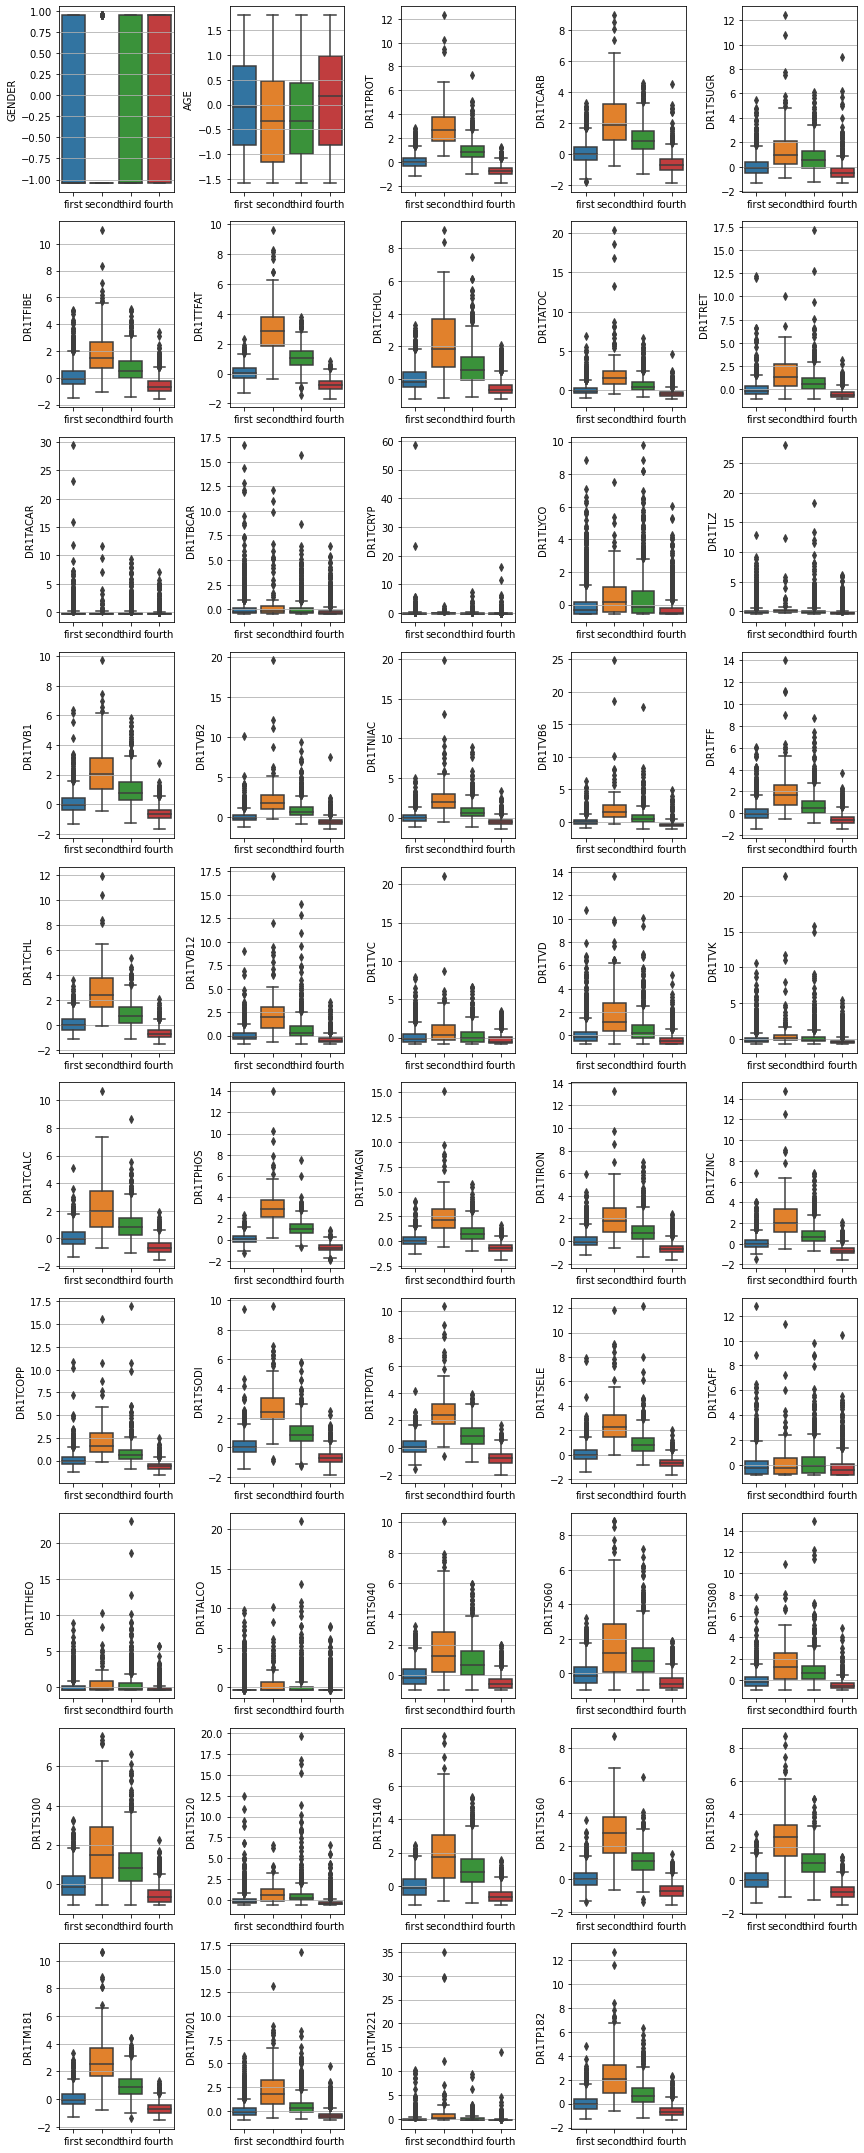

In [500]:
#plot clusters / features
plt.figure( figsize=( 12.0, 30.0 ) )
for i in range( 49 ):
    plt.subplot( 10,5, i + 1 )
    plt.grid( True )
    sn.boxplot( x=kmeans_pca.labels_, y=scaled1.columns[i], data=scaled1)
    plt.xticks( [ 0, 1,2,3 ], [ 'first', 'second','third','fourth'], rotation=0 )
plt.tight_layout( True )
plt.show()

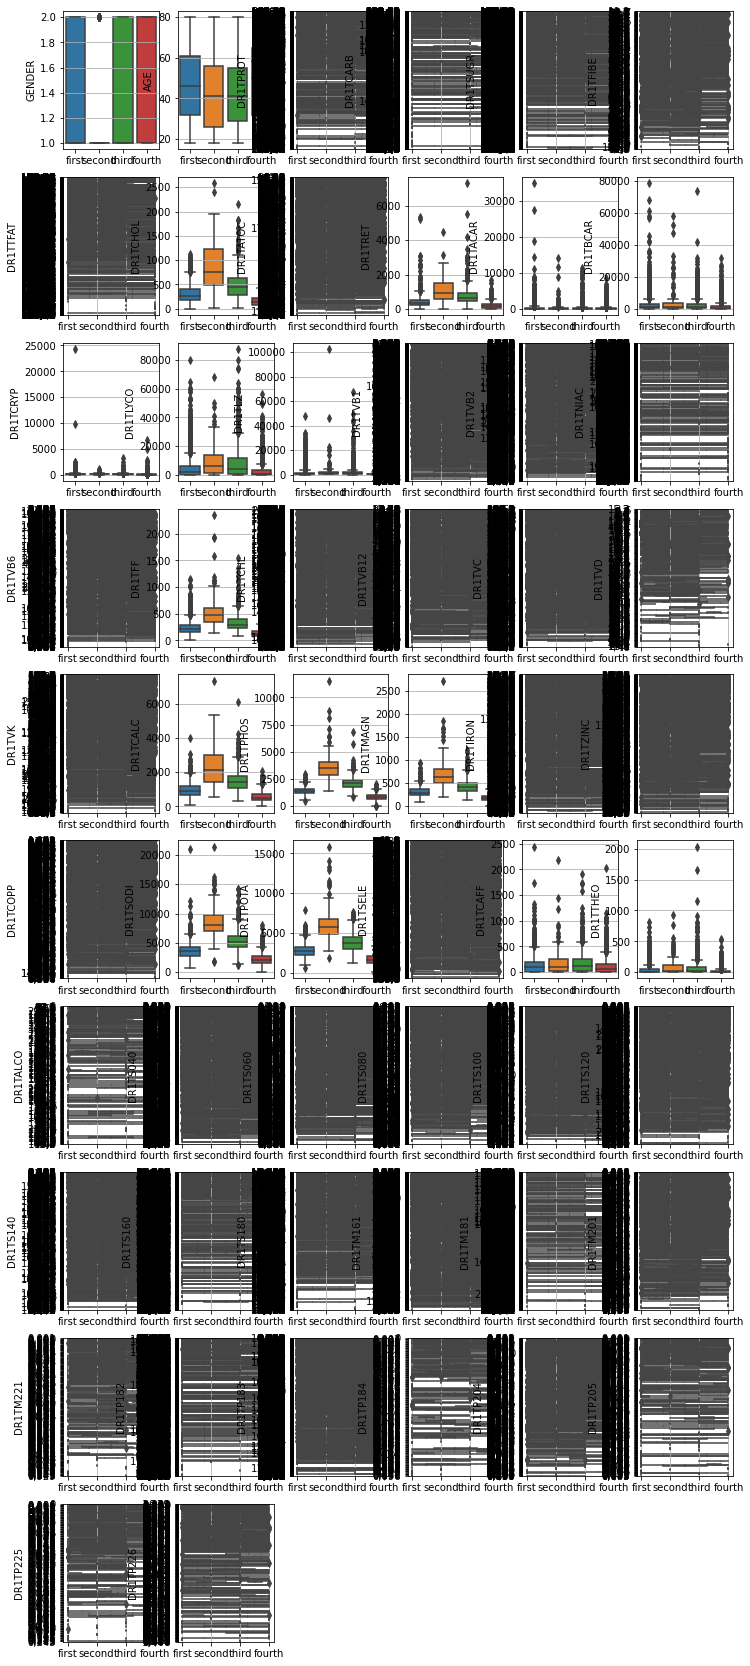

In [464]:
#here just a try of plotting without standardization

plt.figure( figsize=( 12.0, 30.0 ) )
for i in range( 56 ):
    plt.subplot( 10,6, i + 1 )
    plt.grid( True )
    sn.boxplot( x=kmeans_pca.labels_, y=df.columns[i], data=df)
    plt.xticks( [ 0, 1,2,3 ], [ 'first', 'second','third','fourth'], rotation=0 )
#plt.tight_layout( True )
plt.show()

In [478]:
scaled2.info()  # this Dataframe contains ALL the variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5356 entries, 0 to 5355
Data columns (total 58 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GENDER                 5356 non-null   float64
 1   AGE                    5356 non-null   float64
 2   DR1TPROT               5356 non-null   float64
 3   DR1TCARB               5356 non-null   float64
 4   DR1TSUGR               5356 non-null   float64
 5   DR1TFIBE               5356 non-null   float64
 6   DR1TTFAT               5356 non-null   float64
 7   DR1TCHOL               5356 non-null   float64
 8   DR1TATOC               5356 non-null   float64
 9   DR1TRET                5356 non-null   float64
 10  DR1TACAR               5356 non-null   float64
 11  DR1TBCAR               5356 non-null   float64
 12  DR1TCRYP               5356 non-null   float64
 13  DR1TLYCO               5356 non-null   float64
 14  DR1TLZ                 5356 non-null   float64
 15  DR1T

<ipython-input-490-57f5deed7895>:9: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout( True )


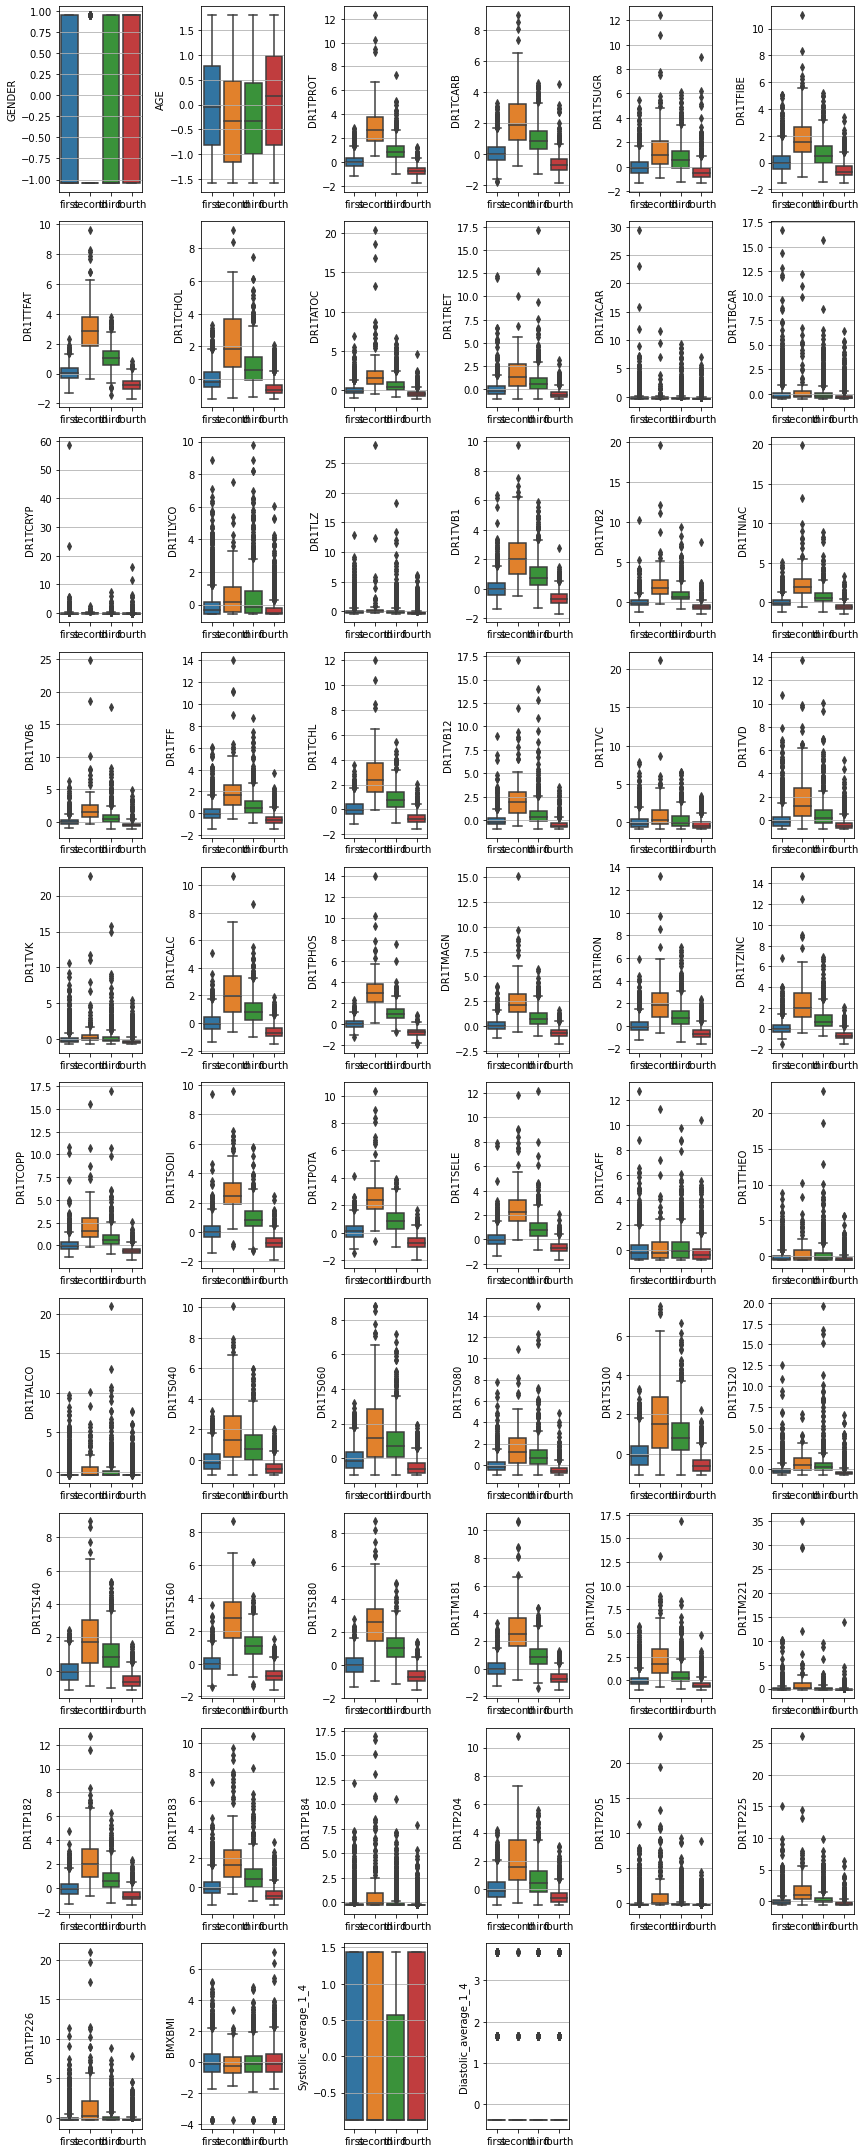

In [490]:
#here just a try of plotting with all variables

plt.figure( figsize=( 12.0, 30.0 ) )
for i in range( 58 ):
    plt.subplot( 10,6, i + 1 )
    plt.grid( True )
    sn.boxplot( x=kmeans_pca.labels_, y=scaled2.columns[i], data=scaled2)
    plt.xticks( [ 0, 1,2,3 ], [ 'first', 'second','third','fourth'], rotation=0 )
plt.tight_layout( True )
plt.show()

<ipython-input-595-a1224ada9913>:12: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout( True )


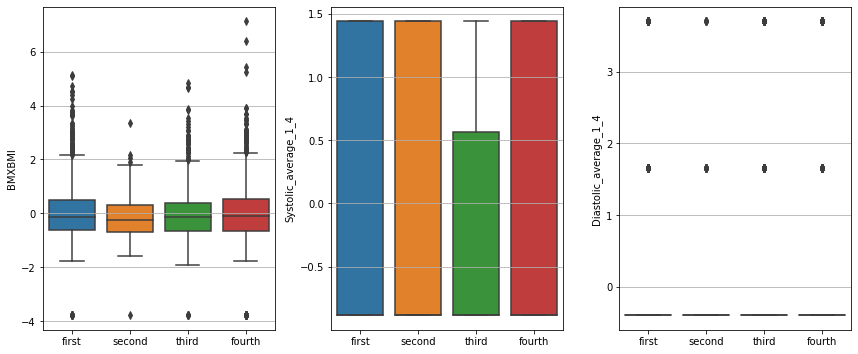

In [595]:
#here just a try of plotting to compare the "target variable BMX, DIASTOLIC and SYSTOLIC" that is meaningless
# and this is confirmed from the data, in fact Body Mass index that is an important variable 

scaled3 = scaled2.iloc[:,[55,56,57]].copy()
# selected column index: 1, 6, 7

plt.figure( figsize=( 12.0, 5.0 ) )
for i in range( 3 ):
    plt.subplot( 1,3, i + 1 )
    plt.grid( True )
    sn.boxplot( x=kmeans_pca.labels_, y=scaled3.columns[i], data=scaled3)
    plt.xticks( [ 0, 1,2,3 ], [ 'first', 'second','third','fourth'], rotation=0 )
plt.tight_layout( True )
plt.show()

# Hierarchical Clustering

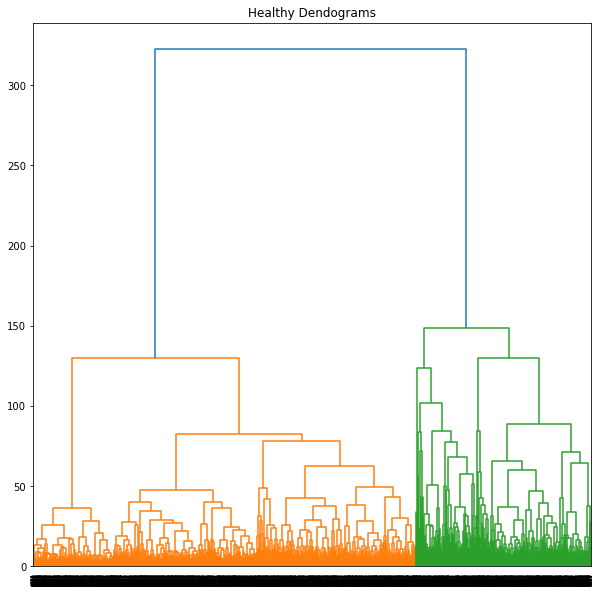

In [596]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 10))
plt.title("Healthy Dendograms")
dend = shc.dendrogram(shc.linkage(scaled1, method='ward'))

In [597]:
#let us apply the clustering with 2 clusters in the scaled dataFrame:

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(scaled1)

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

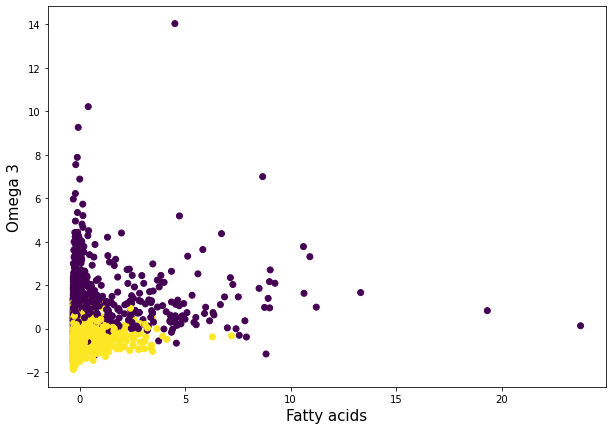

In [604]:
# the model show that selecting the 2 most weighted feature (one belong to PC1 and one to PC2 the CLuster appears well separated
# and this confirms the clustering criteria behind the algorithm)
fig1 = plt.figure(figsize=(10, 7))
ax = fig1.add_subplot(1,1,1) 
ax.set_ylabel('Omega 3', fontsize = 15)
ax.set_xlabel('Fatty acids', fontsize = 15)

plt.scatter(scaled1['DR1TP205'], scaled1['DR1TPHOS'], c=cluster.labels_) 



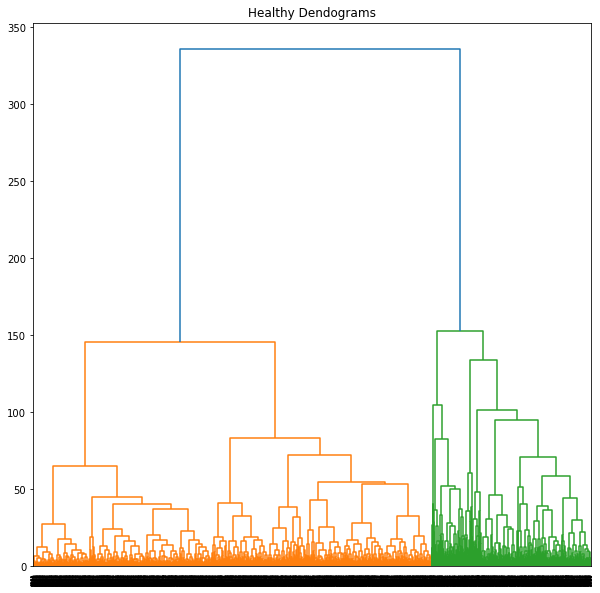

In [600]:
# let us apply the method to the Dataframe contained the 8 PC
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 10))
plt.title("Healthy Dendograms")
dend = shc.dendrogram(shc.linkage(pca_df, method='ward'))

In [601]:
#let us apply the clustering with 2 clusters in the pca dataFrame:

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(pca_df)

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

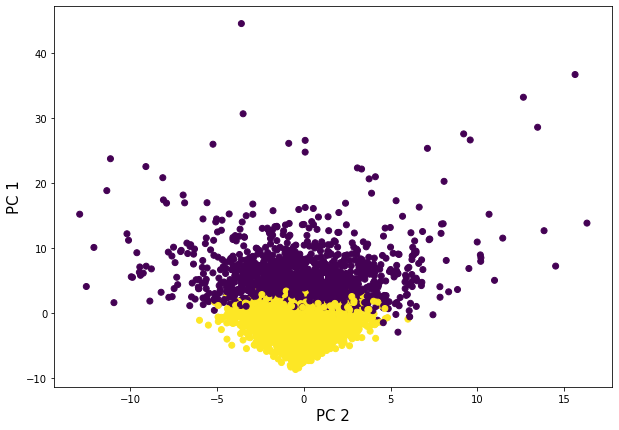

In [682]:
# the model show that selecting the 2 most weighted feature (one belong to PC1 and one to PC2 the CLuster appears well separated
# and this confirms the clustering criteria behind the algorithm)
fig2 = plt.figure(figsize=(10, 7))
ax = fig2.add_subplot(1,1,1) 
ax.set_ylabel('PC 1', fontsize = 15)
ax.set_xlabel('PC 2', fontsize = 15)

plt.scatter(pca_df['PC 2'], pca_df['PC 1'], c=cluster.labels_) 

# this plot is pretty similar to that one with 4 clusters


##  PLOTTING BMI VS PC1

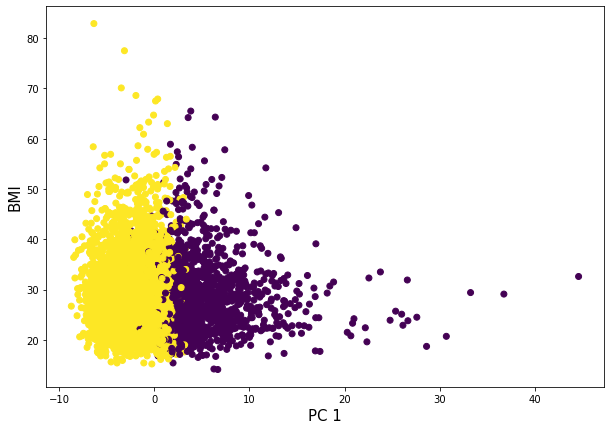

In [681]:
# the model show that selecting the 2 most weighted feature (one belong to PC1 and one to PC2 the CLuster appears well separated
# and this confirms the clustering criteria behind the algorithm)
fig2 = plt.figure(figsize=(10, 7))
ax = fig2.add_subplot(1,1,1) 
ax.set_ylabel('BMI', fontsize = 15)
ax.set_xlabel('PC 1', fontsize = 15)

plt.scatter(pca_df['PC 1'],df5['BMXBMI'], c=cluster.labels_) 


# Conclusion

we moved from 4 clusters to 2 using firstly k-means and then the hierarchical and the considerations done with 4 clusters appears to be proved using 2 clusters, in fact there are 2 groups of nutritions that we can considered as "FATS" or "Healthy" and the first 2 Principal component show how well separated are the 2 clusters.

The values of Presssure can't be considered relevant in our Analysis in fact we have proven that: 
- 4554 show that on average people have a mormal level of Diastolic pressure  
- 2780 dont have a problem connected to Systolic pressure and another big portion is close to the "normal" level 

As we can see from the plot above, there is a WELL DEFINED separation between PC1 and BMI, when the BMI increase there is a cluster separation, in fact if we consider all features which compose the PC1 can be reasonable that increasing the PC1' features there is a change in cluster after a value.